In [1]:
from modules import *
from torch.optim import Adam
from  tqdm.notebook import tqdm
import matplotlib.animation as animation
import imageio
import matplotlib.pyplot as plt

In [2]:
batch_size = 200
loader = get_data_loader(batch_size)

In [3]:
device = "cuda"

model = Unet(time_dim=200, dims=((16, 32),(32,64),(64, 128)))
model = model.to(device)

optimizer = Adam(model.parameters(), lr=1e-5)

In [4]:
time_steps = 125
S = schedule(time_steps, device)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 0 Loss: 0.9998870491981506


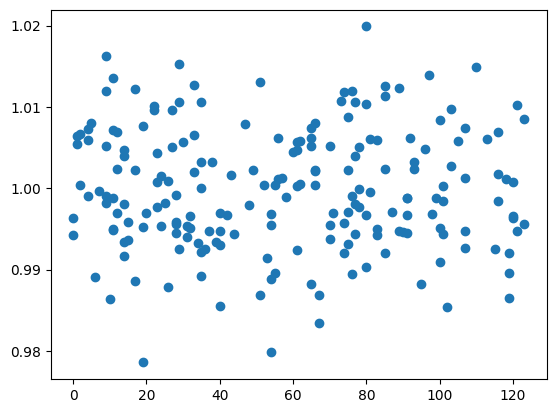

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 2 Loss: 0.9998193383216858


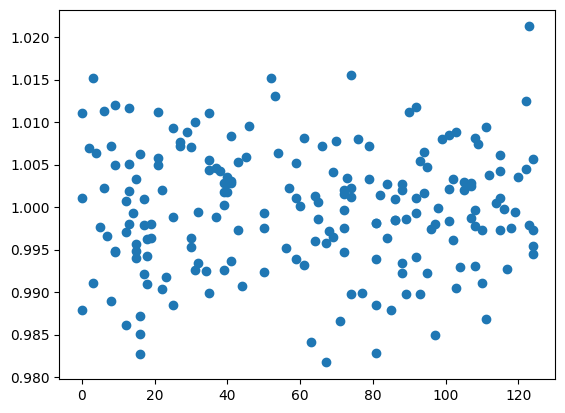

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 4 Loss: 1.0008732080459595


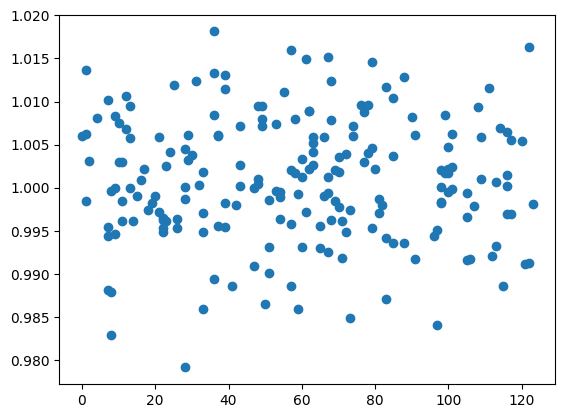

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 6 Loss: 0.9995656609535217


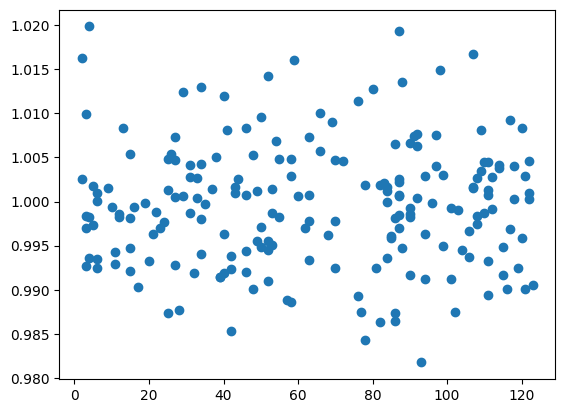

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 8 Loss: 1.0002297163009644


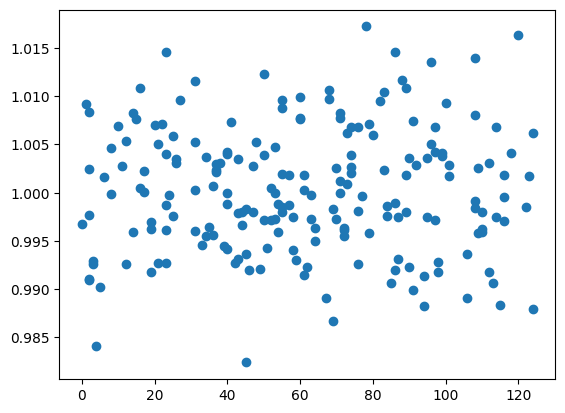

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 10 Loss: 1.0002132654190063


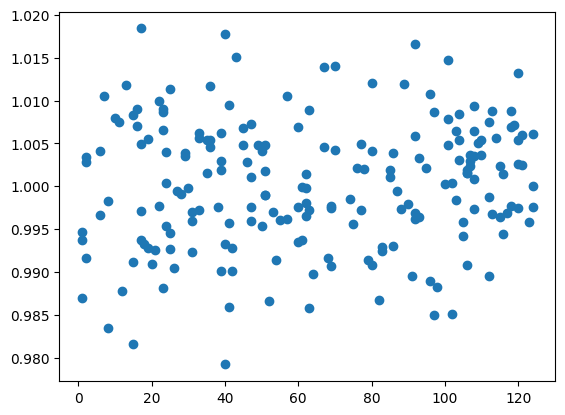

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 12 Loss: 0.9995017647743225


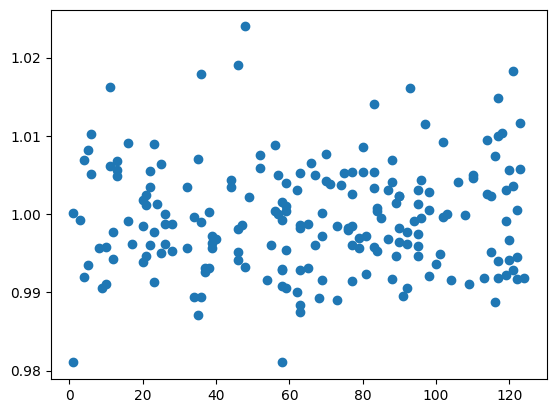

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 14 Loss: 0.9998106956481934


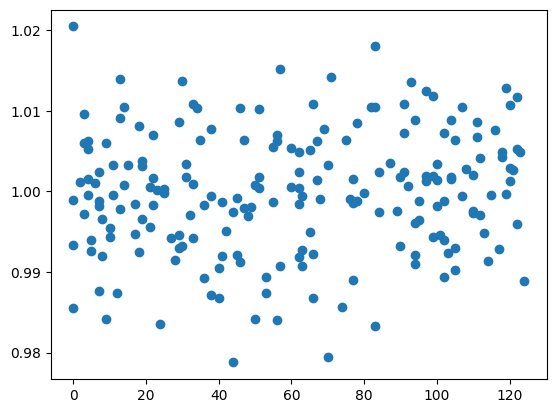

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 16 Loss: 1.0002386569976807


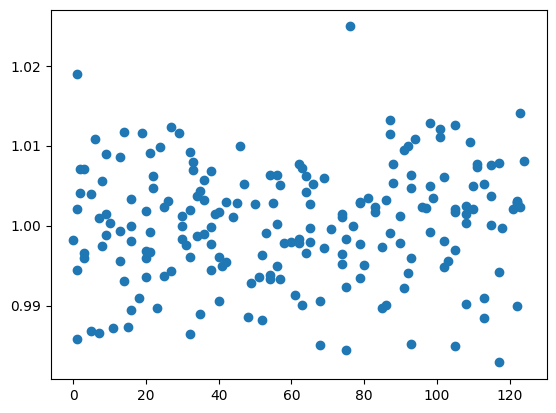

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 18 Loss: 0.9991596937179565


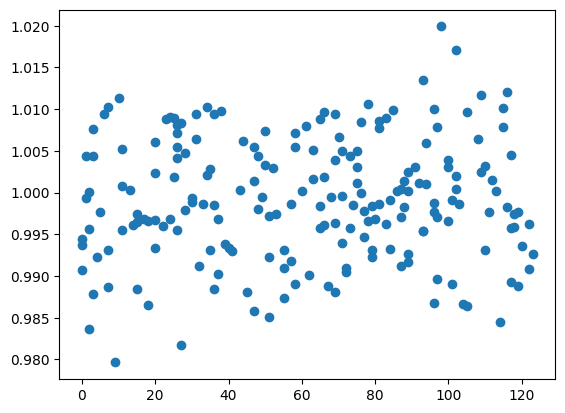

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 20 Loss: 1.0000419616699219


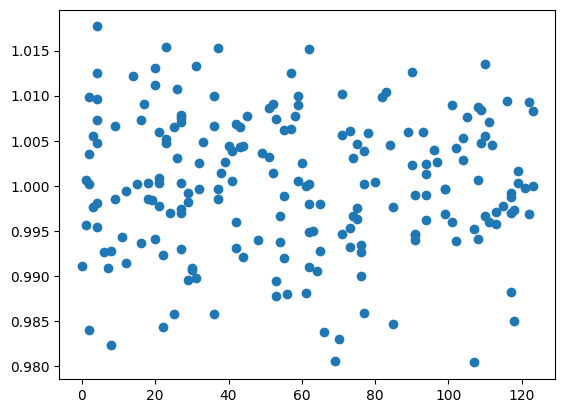

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 22 Loss: 0.9994483590126038


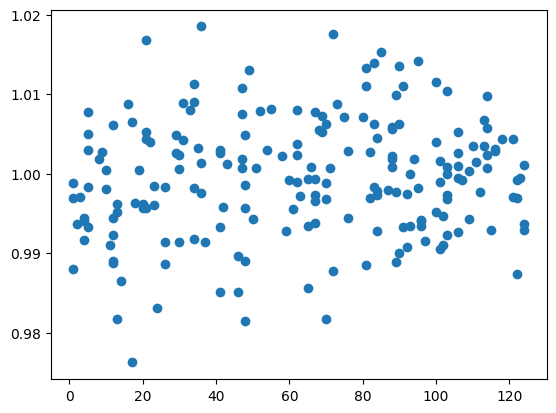

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 24 Loss: 0.9999282360076904


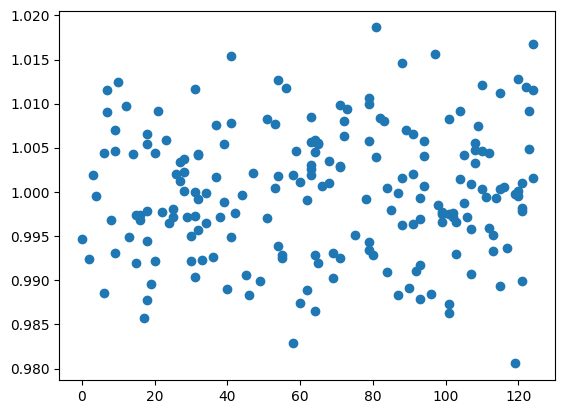

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 26 Loss: 0.9999957084655762


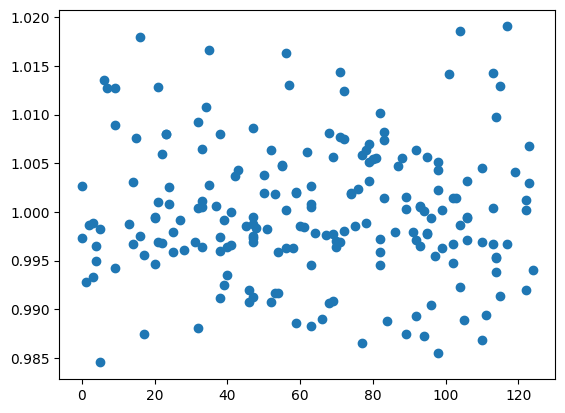

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 28 Loss: 0.9998886585235596


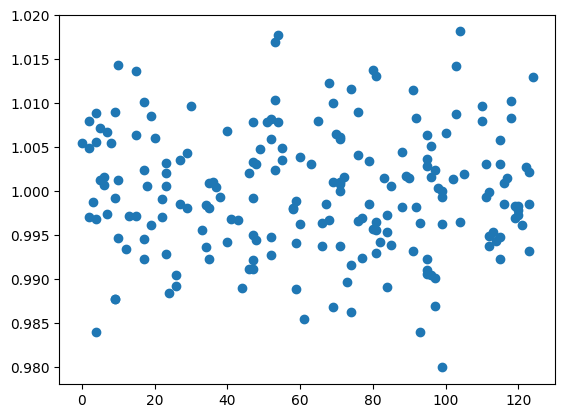

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 30 Loss: 1.0002672672271729


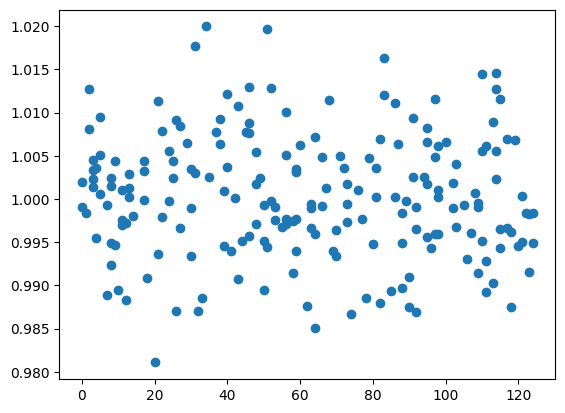

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 32 Loss: 0.9995995759963989


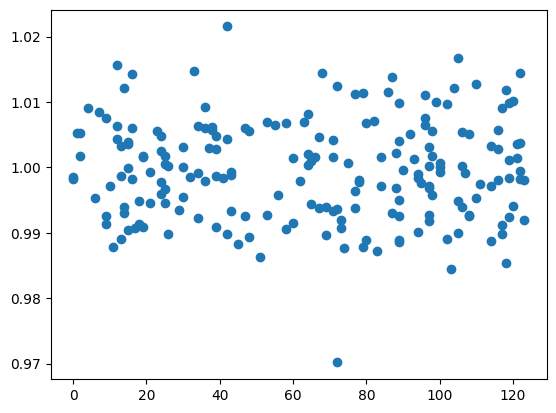

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 34 Loss: 1.0009781122207642


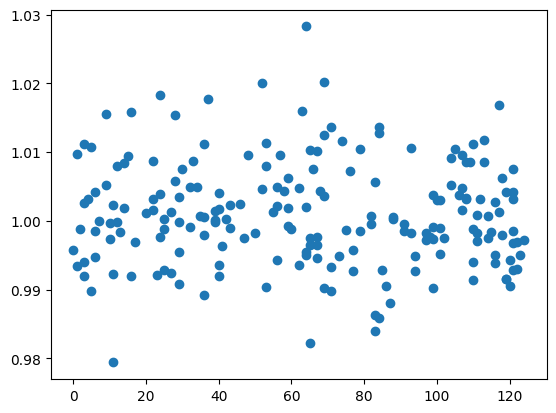

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 36 Loss: 0.9998745322227478


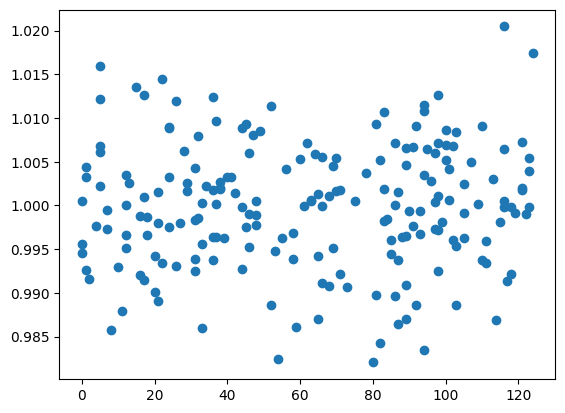

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 38 Loss: 1.0010228157043457


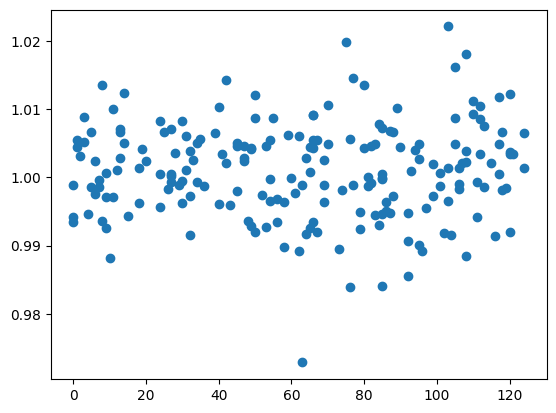

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 40 Loss: 0.9994049072265625


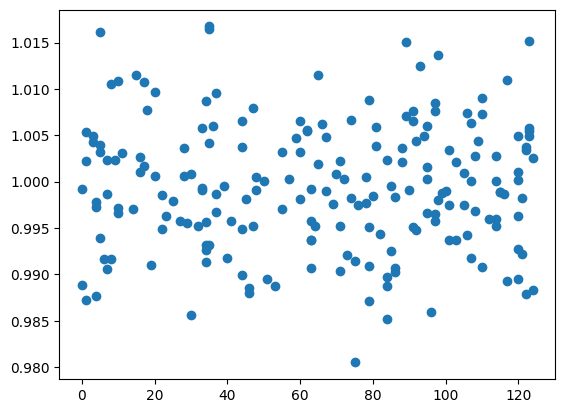

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 42 Loss: 0.9999115467071533


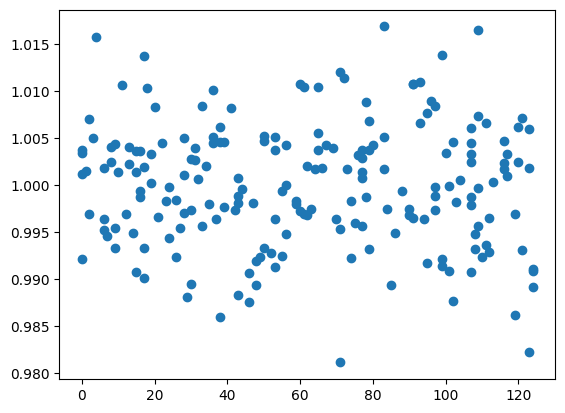

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 44 Loss: 1.0000196695327759


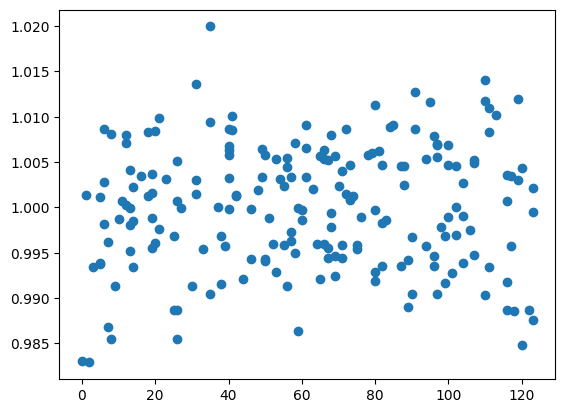

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 46 Loss: 0.9997347593307495


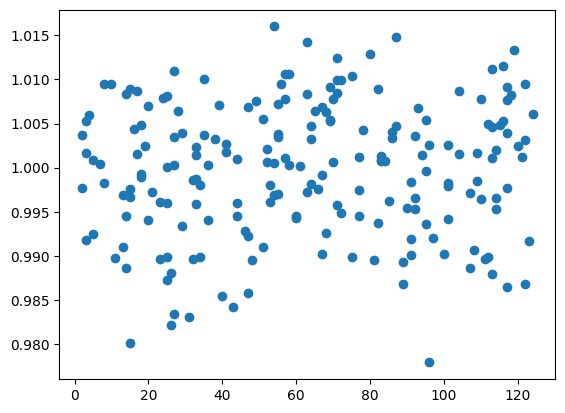

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 48 Loss: 0.9996755719184875


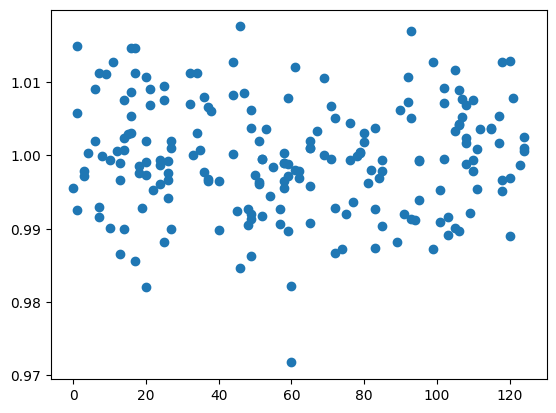

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 50 Loss: 1.0009586811065674


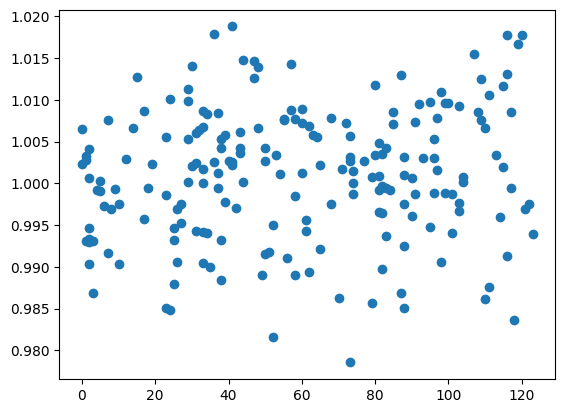

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 52 Loss: 1.000148057937622


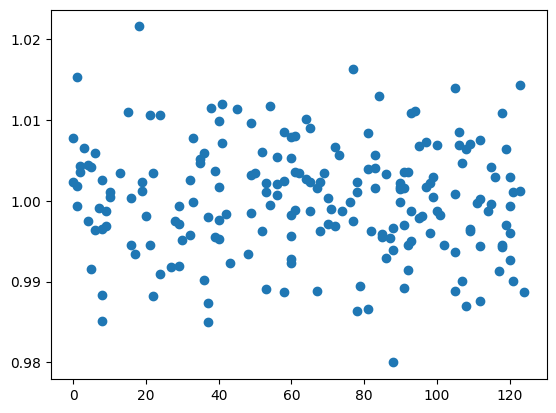

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 54 Loss: 1.0004355907440186


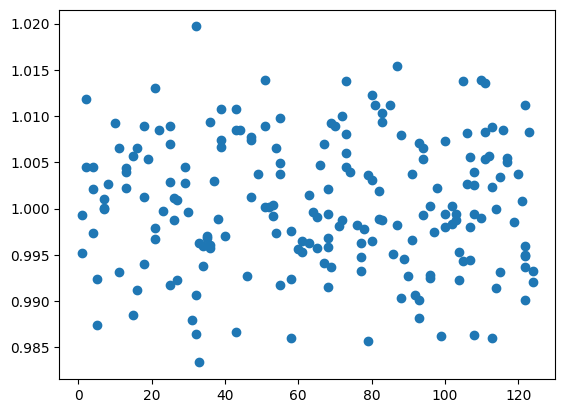

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 56 Loss: 1.0007089376449585


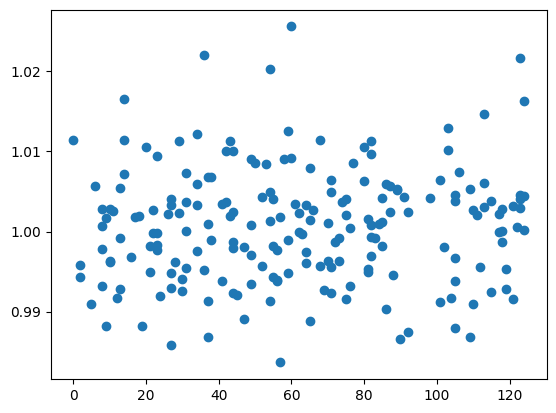

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 58 Loss: 1.0003199577331543


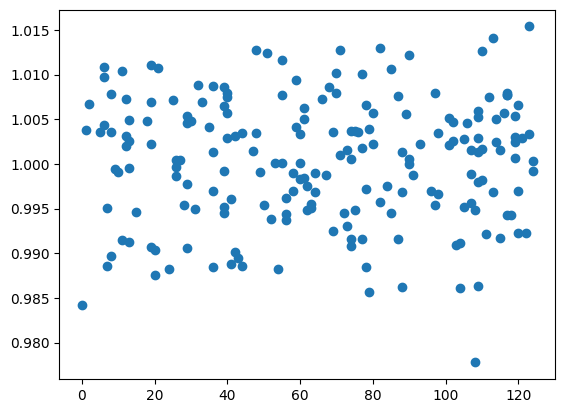

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 60 Loss: 1.0018668174743652


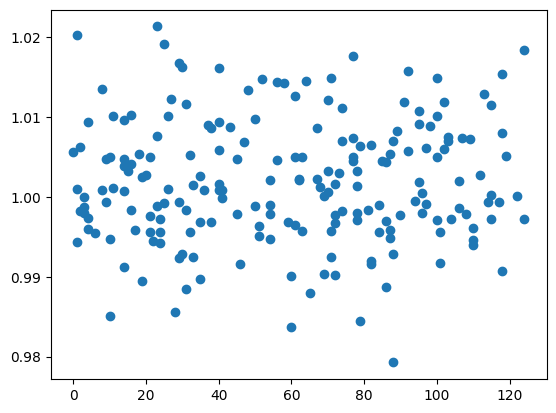

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 62 Loss: 0.9994465708732605


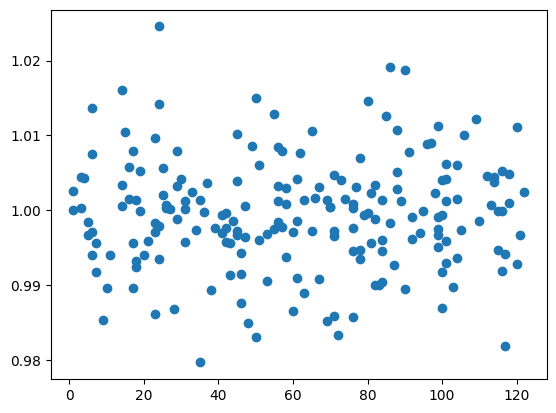

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 64 Loss: 0.999397337436676


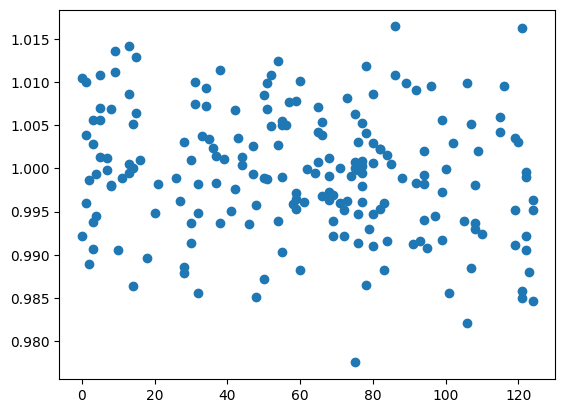

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 66 Loss: 1.0009236335754395


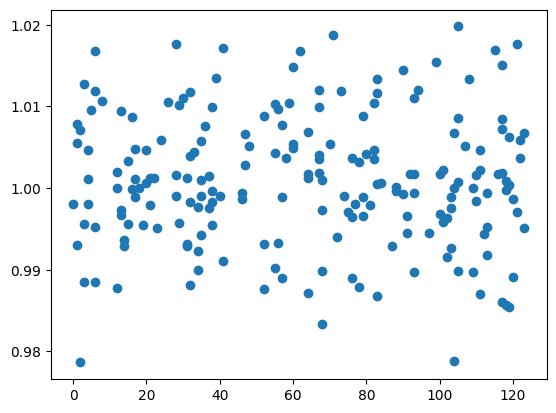

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 68 Loss: 1.0004109144210815


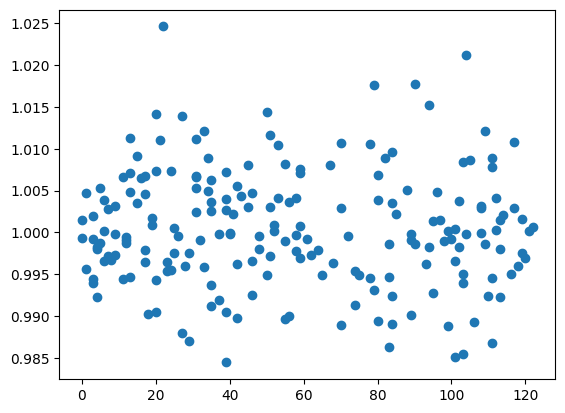

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 70 Loss: 0.9992668628692627


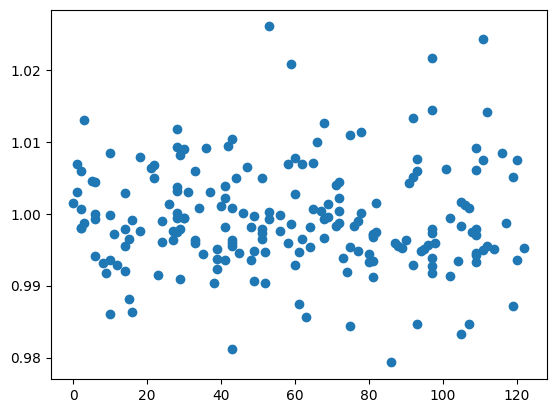

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 72 Loss: 0.9996291995048523


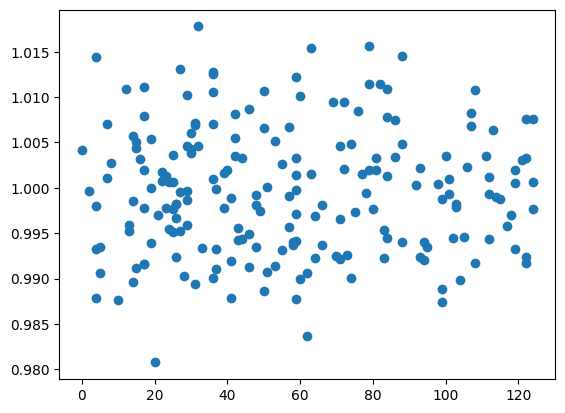

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 74 Loss: 0.999458372592926


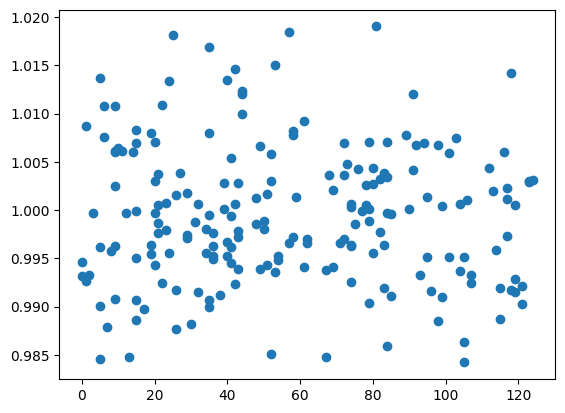

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 76 Loss: 1.0000441074371338


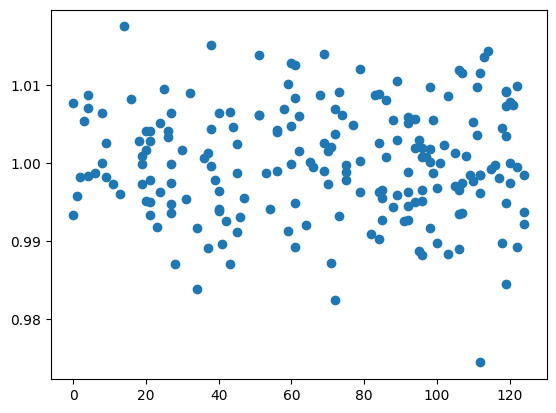

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 78 Loss: 1.0010234117507935


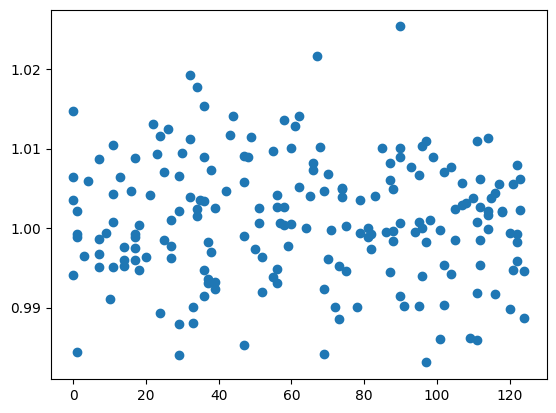

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 80 Loss: 0.9995198845863342


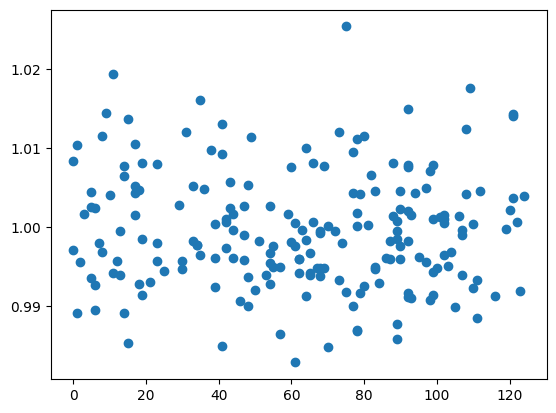

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 82 Loss: 0.9995480179786682


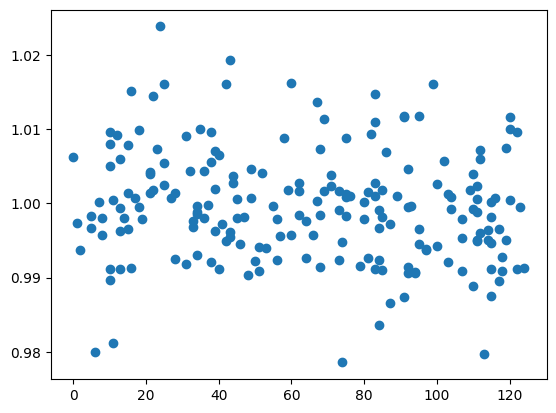

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 84 Loss: 0.9998596906661987


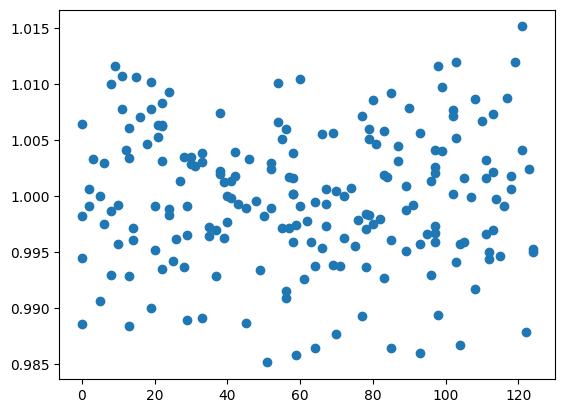

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 86 Loss: 1.00019371509552


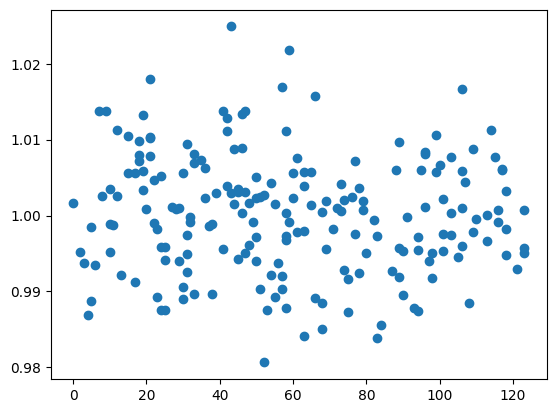

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Batch:   0%|          | 0/963 [00:00<?, ?it/s]

Epoch: 88 Loss: 0.9998238682746887


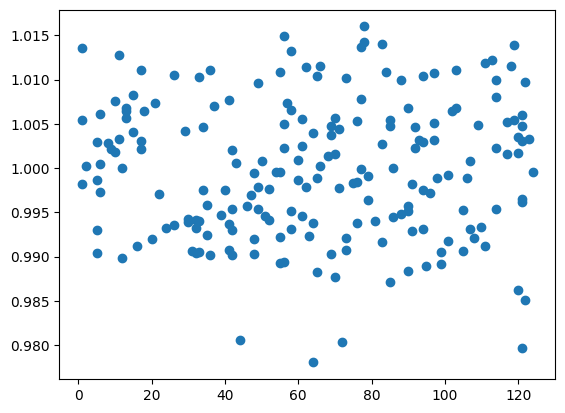

KeyboardInterrupt: 

In [30]:
epochs = 1000
L = []
L_scatter = []

for epoch in tqdm(range(epochs), desc="Epoch", position=0):
    for step, batch in enumerate(tqdm(loader, desc="Batch", position=1, leave=False)):
        optimizer.zero_grad()
        batch = batch.to(device)
        t = torch.randint(0, time_steps, (len(batch),), device=device).long()
        loss = S.loss(model, batch, t)
        MSE = torch.mean(loss)
        MSE.backward()
        optimizer.step()
        if epoch % 2 == 0 and  step == 0:
            print("Epoch:", epoch, "Loss:", MSE.item())
            plt.scatter(t.cpu().detach(),loss.cpu().detach())
            plt.show()
            L.append(MSE)
            L_scatter.append(loss)

In [31]:
M = S.sample(model, device, time_steps).astype(np.uint8)
imageio.mimwrite("output2.gif", M, 'GIF', loop=100)